In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datasets
from datasets import Dataset, DatasetDict

from collections import Counter

/opt/homebrew/Caskroom/miniconda/base/envs/final/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [101]:
# Load finer-ord dataframes
train_df = pd.read_csv('final_project/finer-ord/train.csv')
test_df = pd.read_csv('final_project/finer-ord/test.csv')
val_df = pd.read_csv('final_project/finer-ord/val.csv')

In [123]:
train_df.shape[0]

80531

In [137]:
def add_unique_id(df, counter_start=0):
    df['id'] = "x"

    counter = counter_start

    for x in df['doc_idx'].unique():
        doc_df = df.loc[df['doc_idx'] == x]
        
        for y in range(0, doc_df['sent_idx'].nunique()):
            df.loc[(df['doc_idx'] == x) & (df['sent_idx'] == y), "id"] = counter
            counter += 1

    return df

In [138]:
# Add unique IDs to each row across all three dataframes
train_df = add_unique_id(train_df)
# train_df.tail()
val_df = add_unique_id(val_df,counter_start=3262)
# val_df.tail()
test_df = add_unique_id(test_df,counter_start=3664)

# Combine all three dataframes into one
frames = [train_df, val_df, test_df]
finer_df = pd.concat(frames)

In [141]:
print("Shape of finer_df:", finer_df.shape)
print("finer_df.head(10)")
finer_df.head(10)

Shape of finer_df: (116721, 5)
finer_df.head(10)


,gold_label,gold_token,doc_idx,sent_idx,id
0,0,Kenyan,0,0,0
1,0,Firms,0,0,0
2,0,Eye,0,0,0
3,0,Deals,0,0,0
4,0,During,0,0,0
5,1,Obama,0,0,0
6,0,Summit,0,0,0
7,0,Tagged,0,0,0
8,0,:,0,0,0
9,0,The,0,0,0


In [145]:
finer_df.iloc[0]

gold_label         0
gold_token    Kenyan
doc_idx            0
sent_idx           0
id                 0
Name: 0, dtype: object

In [146]:
finer_df.dtypes

gold_label     int64
gold_token    object
doc_idx        int64
sent_idx       int64
id            object
dtype: object

In [147]:
# Change "id" column to int64
finer_df.astype({'id': 'int64'}).dtypes

gold_label     int64
gold_token    object
doc_idx        int64
sent_idx       int64
id             int64
dtype: object

In [148]:
# Check for nan values
finer_df.isnull().sum()

gold_label    0
gold_token    1
doc_idx       0
sent_idx      0
id            0
dtype: int64

In [149]:
# Identify null value
finer_df[finer_df['gold_token'].isnull()]

,gold_label,gold_token,doc_idx,sent_idx,id
77148,0,NaN,152,11,3125


In [150]:
# View sentence containing null value 
finer_df[finer_df['id'] == 3125]

,gold_label,gold_token,doc_idx,sent_idx,id
77147,0,"""",152,11,3125
77148,0,NaN,152,11,3125
77149,0,of,152,11,3125
77150,0,the,152,11,3125
77151,0,banks,152,11,3125
77152,0,have,152,11,3125
77153,0,embraced,152,11,3125
77154,0,this,152,11,3125
77155,0,capability,152,11,3125
77156,0,.,152,11,3125


In [151]:
# Handle nan value
finer_df = finer_df.drop(range(77147,77157))

In [152]:
# Recheck for nan values
finer_df.isnull().sum()

gold_label    0
gold_token    0
doc_idx       0
sent_idx      0
id            0
dtype: int64

In [113]:
# Print labels
finer_text_labels = ["O", "B-PER", "I-PER", "B-LOC", "I-LOC", "B-ORG", "I-ORG"]
finer_unique_labels = finer_df["gold_label"].unique()

print("finer_df text labels:", finer_text_labels)
print("finer_df unique labels:", finer_unique_labels)

finer_df text labels: ['O', 'B-PER', 'I-PER', 'B-LOC', 'I-LOC', 'B-ORG', 'I-ORG']
finer_df unique labels: [0 1 3 2 4 5 6]


In [154]:
# Count number of instances for each label
num_of_instances = []

for i in finer_unique_labels: 
    num_of_i = len(finer_df[finer_df["gold_label"] == i])
    num_of_instances.append(num_of_i)

# Calculate total instances
total_instances = sum(num_of_instances)

# Print out the number of instances for each label and add percentage to finer_class_proportions
finer_class_proportions = []

for i in range(0, len(num_of_instances)):
    print("Label:", finer_text_labels[i])
    print("Num of Instances:", f"{num_of_instances[i]:,}","of", f"{total_instances:,}")
    instance_proportion = num_of_instances[i]/total_instances
    print("Percentage:", f"{(instance_proportion):.4f}","\n")
    finer_class_proportions.append(instance_proportion*100)

Label: O
Num of Instances: 107,802 of 116,711
Percentage: 0.9237 

Label: B-PER
Num of Instances: 1,243 of 116,711
Percentage: 0.0107 

Label: I-PER
Num of Instances: 1,459 of 116,711
Percentage: 0.0125 

Label: B-LOC
Num of Instances: 819 of 116,711
Percentage: 0.0070 

Label: I-LOC
Num of Instances: 491 of 116,711
Percentage: 0.0042 

Label: B-ORG
Num of Instances: 2,844 of 116,711
Percentage: 0.0244 

Label: I-ORG
Num of Instances: 2,053 of 116,711
Percentage: 0.0176 



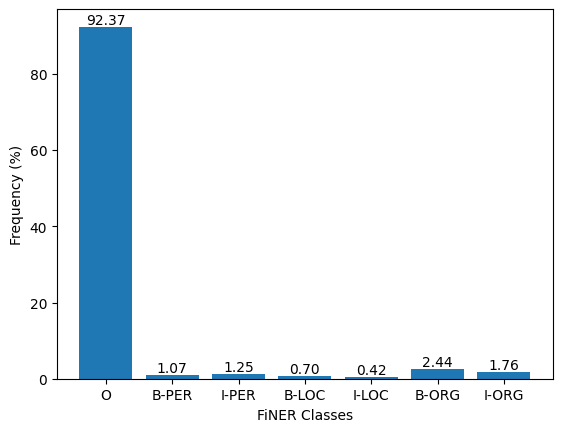

In [155]:
# Plot proportions of labels in FiNER-ORD
fig, ax = plt.subplots()
vbars = ax.bar(finer_text_labels, finer_class_proportions)
ax.set_xlabel('FiNER Classes')
ax.set_ylabel('Frequency (%)')
ax.bar_label(vbars, fmt='%.2f')

plt.show()

In [157]:
# Number of sentences in finer_df
num_of_sentences = finer_df["id"].nunique()

# Calculate statistics for sentence lengths
len_sentences = []

unique_sentences = finer_df["id"].unique()

for i in unique_sentences:
    sentence_df = finer_df[finer_df["id"] == i]
    sentence = sentence_df["gold_token"].tolist()
    len_sentence = len(sentence)
    len_sentences.append(len_sentence)

print("Number of sentences in finer_df:", num_of_sentences)
print("Max Sentence Length:", max(len_sentences))
print("Min Sentence Length:", min(len_sentences))
print("Average sentence length:", sum(len_sentences) / len(len_sentences))

Number of sentences in music_df: 4738
Max Sentence Length: 139
Min Sentence Length: 1
Average sentence length: 24.63296749683411


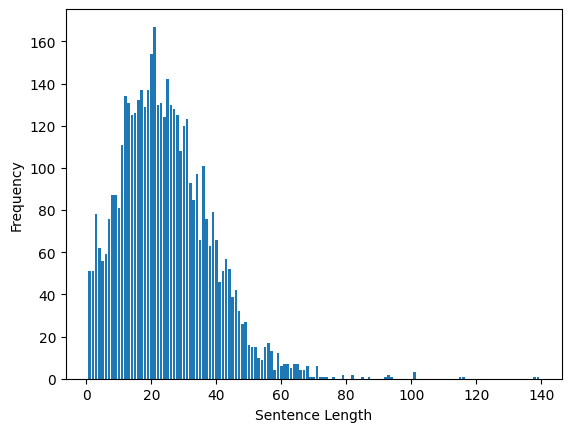

In [158]:
# Plot sentence length distribution
frequency = Counter(len_sentences)
sentence_len = list(frequency.keys())
sentence_len_counts = list(frequency.values())

plt.bar(sentence_len, sentence_len_counts)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.show()

In [160]:
# Retrieve sample sentences
def print_sample_sentence(df, id):
    select_sentence = df.loc[(df["id"] == id)]
    
    sample_sentence_tokens = select_sentence["gold_token"].to_list()
    joined_sentence = " ".join(sample_sentence_tokens)
    print(joined_sentence)
    print(select_sentence["gold_label"].to_list())

print_sample_sentence(finer_df, 0)
print(" ")
print_sample_sentence(finer_df, 1111)
print(" ")
print_sample_sentence(finer_df, 2222)

Kenyan Firms Eye Deals During Obama Summit Tagged : The Global Entrepreneurship Summit , launched by President Obama in 2009 , brings together entrepreneurs and investors from across Africa and around the world annually to showcase innovative projects , exchange new ideas , and help spur economic opportunity .
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 
Those are bad outcomes .
[0, 0, 0, 0, 0]
 
And it 's a sign that the business community and the financial advice industry has successfully convinced half of the Democratic caucus — as well as all Republicans — that Obama 's current plan does more harm than good .
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [177]:
# Calculate average labels in sentence
def retrieve_labels_in_sent(df, id):
    select_sentence = df.loc[(df["id"] == id)]
    
    sample_labels = select_sentence["gold_label"].to_list()
    
    label_counter = 0

    for i in sample_labels:
        if i != 0:
            label_counter += 1

    print(label_counter)

for i in range(0,)
retrieve_labels_in_sent(finer_df, 1)

4


In [161]:
def get_dict_from_sent(df, uid):
    
    dict = {'id':'', 'tokens':'', 'ner_tags':[]}
    sent_df = df.loc[df['id'] == uid]
    
    dict['id'] = sent_df['id'].to_list()[0]
    dict['tokens'] = sent_df['gold_token'].to_list()
    dict['ner_tags'] = sent_df['gold_label'].to_list() 

    return dict

dataset = []

for i in unique_sentences:
    dataset.append(get_dict_from_sent(finer_df, i))

In [166]:
# Create huggingface dataset
ds = Dataset.from_pandas(pd.DataFrame(data=dataset))
ds

In [ ]:
# Save dataset to json
# ds.to_json('final_project/finer-ord/finer.json', orient='records', lines=True)